# Real-time Audio Processing with CRISP-DM: Swahili Speech Analysis

This notebook implements a comprehensive audio processing pipeline using the Mozilla Common Voice Swahili dataset, following the CRISP-DM methodology. We'll cover speech-to-text conversion, sentiment analysis, and text summarization with state-of-the-art models.

## Table of Contents
1. [Library Imports and Setup](#1)
2. [Business Understanding](#2)
3. [Data Understanding](#3)
4. [Data Preparation](#4)
5. [Modeling](#5)
6. [Evaluation](#6)
7. [Deployment](#7)
8. [Feedback Loop and Model Refinement](#8)

<a id='1'></a>
## 1. Library Imports and Setup

First, we'll import all necessary libraries and explain their purposes in our project.

In [1]:
# Core ML and Data Processing
!pip install torch
!pip install tensorflow
!pip install transformers
!pip install librosa
!pip install numpy
!pip install pandas
!pip install datasets

# Visualization
!pip install matplotlib
!pip install seaborn

# NLP and Speech Processing
!pip install spacy
!pip install speechbrain
!pip install rouge-score

# Word Processing
!pip install jiwer

# Parallel Processing
!pip install tqdm

# Web Interface
!pip install streamlit

# Vector Search
!pip install faiss-cpu


!pip install setuptools
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install keras
!pip install sklearn
!pip install tensorflow
!pip install keras-tuner
!pip install keras-tuner --upgrade
!pip install tensorflow --upgrade
!pip install keras-tuner --upgrade
!pip install keras-tuner --upgrade



  Using cached torch-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x8

In [3]:
!pip install setuptools
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install keras
!pip install sklearn
!pip install tensorflow
!pip install keras-tuner
!pip install keras-tuner --upgrade
!pip install tensorflow --upgrade
!pip install keras-tuner --upgrade
!pip install keras-tuner --upgrade


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info 

In [6]:
# Core ML and Data Processing
import torch
import tensorflow as tf
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
import librosa
import numpy as np
import pandas as pd
from datasets import load_dataset

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP and Speech Processing
import spacy
from speechbrain.pretrained import EncoderDecoderASR

# Parallel Processing
from concurrent.futures import ThreadPoolExecutor
import multiprocessing

# Web Interface
import streamlit as st

# Vector Search
import faiss

# Utility
import os
import json
import time
from tqdm.notebook import tqdm

print("Libraries imported successfully!")

ModuleNotFoundError: No module named 'distutils'

### Library Purposes

- **torch & tensorflow**: Deep learning frameworks for model development
- **transformers**: Hugging Face's library for state-of-the-art NLP models
- **librosa**: Audio and music processing
- **spacy**: Natural language processing tasks
- **speechbrain**: Speech recognition and processing
- **matplotlib & seaborn**: Data visualization
- **streamlit**: Interactive web application development
- **faiss**: Efficient similarity search for large datasets
- **datasets**: Hugging Face's dataset management

<a id='2'></a>
## 2. Business Understanding

### Problem Definition

Our project aims to develop a comprehensive audio processing system for Swahili speech with three main objectives:

1. **Speech-to-Text Conversion**: Accurately transcribe Swahili speech to text
2. **Sentiment Analysis**: Analyze the emotional content of transcribed speech
3. **Text Summarization**: Generate concise summaries of transcribed content

### Real-world Applications

- **Education**: Supporting language learning and assessment
- **Business Intelligence**: Analyzing customer feedback in Swahili-speaking regions
- **Media Monitoring**: Processing Swahili broadcast content
- **Healthcare**: Facilitating medical consultations in Swahili-speaking communities
- **Government Services**: Improving accessibility of public services

<a id='3'></a>
## 3. Data Understanding

Let's load and explore the Mozilla Common Voice Swahili dataset.

In [6]:
# Load the dataset
dataset = load_dataset("mozilla-foundation/common_voice_11_0", "sw", split="train", trust_remote_code=True)

# Display basic information
print(f"Dataset size: {len(dataset)} samples")
print("\nDataset features:", dataset.features)

# Create a DataFrame for analysis
df = pd.DataFrame({
    'path': dataset['path'],
    'sentence': dataset['sentence'],
    'age': dataset['age'],
    'gender': dataset['gender'],
    'accent': dataset['accent']
})
# Display sample statistics
print("\nDataset Overview:")
print(df.describe())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

common_voice_11_0.py:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/60.9k [00:00<?, ?B/s]

n_shards.json:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

sw_train_0.tar:   0%|          | 0.00/907M [00:00<?, ?B/s]

sw_dev_0.tar:   0%|          | 0.00/352M [00:00<?, ?B/s]

sw_test_0.tar:   0%|          | 0.00/355M [00:00<?, ?B/s]

sw_other_0.tar:   0%|          | 0.00/1.28G [00:00<?, ?B/s]

sw_other_1.tar:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

sw_other_2.tar:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

sw_other_3.tar:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

sw_other_4.tar:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

sw_other_5.tar:   0%|          | 0.00/1.28G [00:00<?, ?B/s]

sw_other_6.tar:   0%|          | 0.00/3.30M [00:00<?, ?B/s]

sw_invalidated_0.tar:   0%|          | 0.00/1.44G [00:00<?, ?B/s]

sw_invalidated_1.tar:   0%|          | 0.00/284M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/6.30M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/2.40M [00:00<?, ?B/s]

other.tsv:   0%|          | 0.00/55.9M [00:00<?, ?B/s]

invalidated.tsv:   0%|          | 0.00/11.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 4964it [00:00, 40791.13it/s]
Reading metadata...: 9044it [00:00, 32524.25it/s]
Reading metadata...: 12356it [00:00, 27834.72it/s]
Reading metadata...: 15189it [00:00, 21235.54it/s]
Reading metadata...: 17461it [00:00, 19577.52it/s]
Reading metadata...: 21846it [00:00, 25513.76it/s]
Reading metadata...: 26614it [00:00, 27192.32it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 10233it [00:00, 76220.26it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 10238it [00:00, 84111.52it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 6127it [00:00, 61259.10it/s]
Reading metadata...: 12253it [00:00, 50164.60it/s]
Reading metadata...: 17395it [00:00, 41999.80it/s]
Reading metadata...: 21846it [00:00, 42614.84it/s]
Reading metadata...: 26212it [00:00, 37691.65it/s]
Reading metadata...: 33720it [00:00, 48308.23it/s]
Reading metadata...: 44690it [00:00, 66025.28it/s]
Reading metadata...: 53058it [00:00, 71175.92it/s]
Reading metadata...: 60514it [00:01, 66702.35it/s]
Reading metadata...: 67462it [00:01, 60855.36it/s]
Reading metadata...: 73809it [00:01, 56502.66it/s]
Reading metadata...: 79667it [00:01, 46106.53it/s]
Reading metadata...: 84671it [00:01, 45944.58it/s]
Reading metadata...: 89536it [00:01, 45473.30it/s]
Reading metadata...: 96493it [00:01, 51562.29it/s]
Reading metadata...: 102271it [00:01, 53208.53it/s]
Reading metadata...: 108306it [00:02, 55169.63it/s]
Reading metadata...: 113977it [00:02, 54288.41it/s]
Reading metadata...: 119513it [00:02, 4

Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 9195it [00:00, 91938.03it/s]
Reading metadata...: 18437it [00:00, 92120.94it/s]
Reading metadata...: 27650it [00:00, 91231.78it/s]
Reading metadata...: 47470it [00:00, 97771.44it/s]


Dataset size: 26614 samples

Dataset features: {'client_id': Value(dtype='string', id=None), 'path': Value(dtype='string', id=None), 'audio': Audio(sampling_rate=48000, mono=True, decode=True, id=None), 'sentence': Value(dtype='string', id=None), 'up_votes': Value(dtype='int64', id=None), 'down_votes': Value(dtype='int64', id=None), 'age': Value(dtype='string', id=None), 'gender': Value(dtype='string', id=None), 'accent': Value(dtype='string', id=None), 'locale': Value(dtype='string', id=None), 'segment': Value(dtype='string', id=None)}

Dataset Overview:
                                                     path  \
count                                               26614   
unique                                              26614   
top     /root/.cache/huggingface/datasets/downloads/ex...   
freq                                                    1   

                                                 sentence       age  gender  \
count                                               2

In [7]:
df.head(3)

,path,sentence,age,gender,accent
0,/root/.cache/huggingface/datasets/downloads/ex...,Uko katika pembe la kusini-mashariki kabisa la...,,,
1,/root/.cache/huggingface/datasets/downloads/ex...,Ina bandari kubwa na ni kitovu cha biashara ya...,,,
2,/root/.cache/huggingface/datasets/downloads/ex...,Ndiyo maana upatikanaji wake wakati mwingine i...,,,


In [8]:
df.dtypes

,0
path,object
sentence,object
age,object
gender,object
accent,object


In [9]:
df.describe()

,path,sentence,age,gender,accent
count,26614,26614,26614,26614,26614
unique,26614,26614,6,3,1
top,/root/.cache/huggingface/datasets/downloads/ex...,Uko katika pembe la kusini-mashariki kabisa la...,twenties,female,
freq,1,1,13874,9771,26614


In [10]:
dataset.features

{'client_id': Value(dtype='string', id=None),
 'path': Value(dtype='string', id=None),
 'audio': Audio(sampling_rate=48000, mono=True, decode=True, id=None),
 'sentence': Value(dtype='string', id=None),
 'up_votes': Value(dtype='int64', id=None),
 'down_votes': Value(dtype='int64', id=None),
 'age': Value(dtype='string', id=None),
 'gender': Value(dtype='string', id=None),
 'accent': Value(dtype='string', id=None),
 'locale': Value(dtype='string', id=None),
 'segment': Value(dtype='string', id=None)}

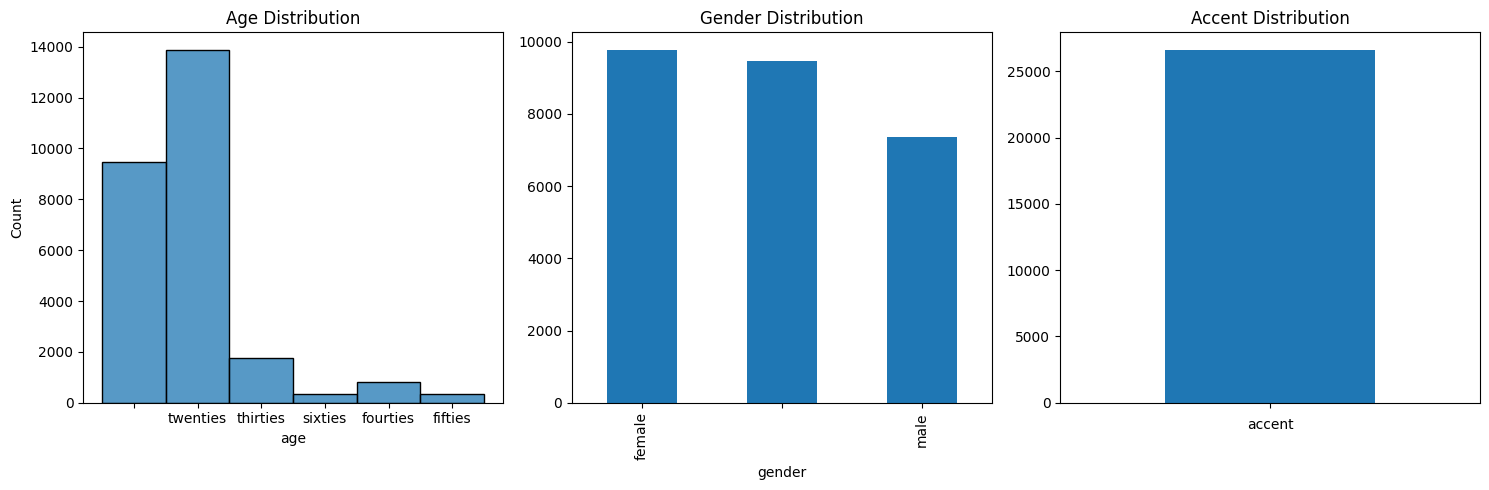

In [11]:
# Visualize dataset statistics
plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(131)
sns.histplot(df['age'].dropna())
plt.title('Age Distribution')

# Gender distribution
plt.subplot(132)
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')

# Accent distribution
plt.subplot(133)
df['accent'].value_counts().plot(kind='bar')
plt.title('Accent Distribution')

plt.tight_layout()
plt.show()

<a id='4'></a>
## 4. Data Preparation

### 4.1 Audio Preprocessing Functions

We'll define several functions to preprocess our audio data:

In [12]:
class AudioPreprocessor:
    def __init__(self, sample_rate=16000):
        self.sample_rate = sample_rate

    def load_and_trim_audio(self, file_path):
        """Load and trim silence from audio."""
        # Load audio file
        audio, sr = librosa.load(file_path, sr=self.sample_rate)
        # Trim silence
        trimmed_audio, _ = librosa.effects.trim(audio, top_db=20)
        return trimmed_audio

    def apply_noise_reduction(self, audio):
        """Apply noise reduction using spectral gating."""
        # Calculate noise floor
        noise_floor = np.mean(np.abs(audio[:int(self.sample_rate/10)]))
        # Apply simple noise gate
        audio[np.abs(audio) < noise_floor*2] = 0
        return audio

    def extract_features(self, audio):
        """Extract MFCC and other features."""
        features = {}
        # Extract MFCCs
        features['mfcc'] = librosa.feature.mfcc(
            y=audio,
            sr=self.sample_rate,
            n_mfcc=13
        )
        # Extract spectral centroid
        features['spectral_centroid'] = librosa.feature.spectral_centroid(
            y=audio,
            sr=self.sample_rate
        )
        # Extract mel spectrogram
        features['melspec'] = librosa.feature.melspectrogram(
            y=audio,
            sr=self.sample_rate
        )
        return features

    def augment_audio(self, audio):
        """Apply data augmentation techniques."""
        augmented = {}
        # Pitch shift
        augmented['pitch_up'] = librosa.effects.pitch_shift(
            y=audio,
            sr=self.sample_rate,
            n_steps=2
        )
        augmented['pitch_down'] = librosa.effects.pitch_shift(
            y=audio,
            sr=self.sample_rate,
            n_steps=-2
        )
        # Time stretch
        augmented['faster'] = librosa.effects.time_stretch(audio, rate=1.2)
        augmented['slower'] = librosa.effects.time_stretch(audio, rate=0.8)
        return augmented

# Initialize preprocessor
preprocessor = AudioPreprocessor()

# Process a sample audio file
sample_audio_path = dataset[0]['path']
audio = preprocessor.load_and_trim_audio(sample_audio_path)
audio = preprocessor.apply_noise_reduction(audio)
features = preprocessor.extract_features(audio)
augmented = preprocessor.augment_audio(audio)

### 4.2 Visualize Audio Processing Results

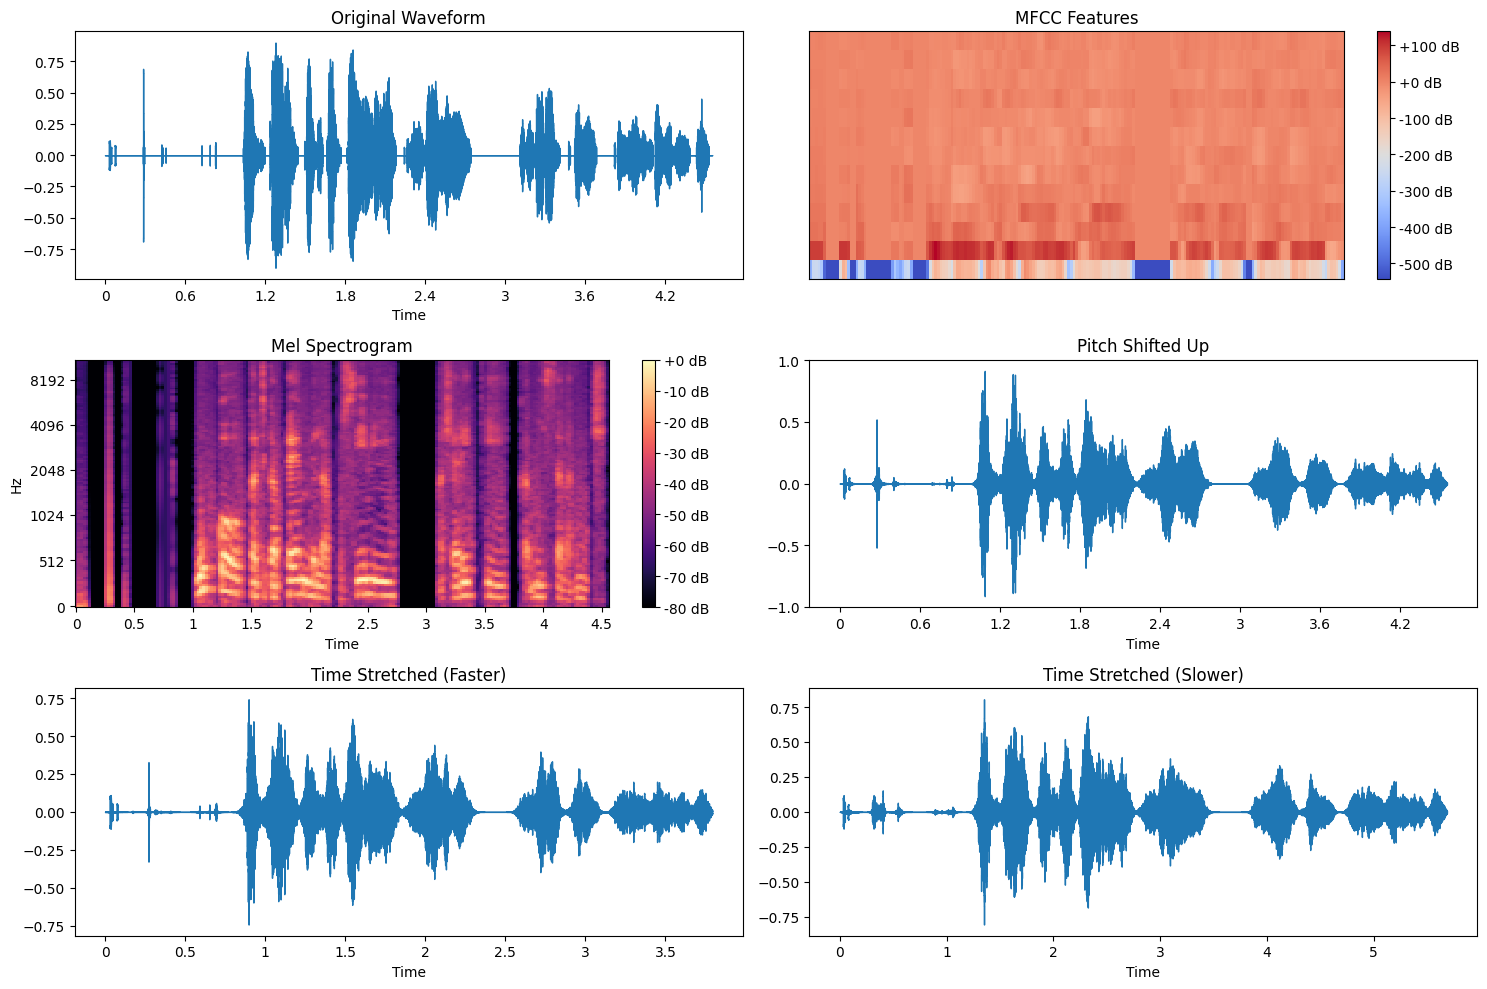

In [13]:
def plot_audio_features(audio, features, augmented):
    plt.figure(figsize=(15, 10))

    # Plot original waveform
    plt.subplot(321)
    librosa.display.waveshow(audio)
    plt.title('Original Waveform')

    # Plot MFCC
    plt.subplot(322)
    librosa.display.specshow(features['mfcc'])
    plt.title('MFCC Features')
    plt.colorbar(format='%+2.0f dB')

    # Plot mel spectrogram
    plt.subplot(323)
    librosa.display.specshow(
        librosa.power_to_db(features['melspec'], ref=np.max),
        y_axis='mel',
        x_axis='time'
    )
    plt.title('Mel Spectrogram')
    plt.colorbar(format='%+2.0f dB')

    # Plot augmented audio examples
    plt.subplot(324)
    librosa.display.waveshow(augmented['pitch_up'])
    plt.title('Pitch Shifted Up')

    plt.subplot(325)
    librosa.display.waveshow(augmented['faster'])
    plt.title('Time Stretched (Faster)')

    plt.subplot(326)
    librosa.display.waveshow(augmented['slower'])
    plt.title('Time Stretched (Slower)')

    plt.tight_layout()
    plt.show()

# Plot the features
plot_audio_features(audio, features, augmented)

### 4.3 Prepare Dataset for Training

Now we'll create a function to process our entire dataset:

In [15]:
def prepare_dataset(dataset, preprocessor, num_samples=None):
    """Process the entire dataset and prepare it for training."""
    processed_data = []

    # Use all samples if num_samples is None, otherwise use the specified amount
    samples = dataset[:num_samples] if num_samples else dataset

    for sample in tqdm(samples, desc="Processing audio files"):
        try:
            # Validate sample structure
            if not isinstance(sample, dict) or 'path' not in sample or 'sentence' not in sample:
                print(f"Invalid or missing data in sample: {sample}")
                continue

            # Process audio
            audio = preprocessor.load_and_trim_audio(sample['path'])
            audio = preprocessor.apply_noise_reduction(audio)
            features = preprocessor.extract_features(audio)

            # Store processed data
            processed_data.append({
                'features': features,
                'text': sample['sentence'],
                'metadata': {
                    'age': sample.get('age', 'unknown'),
                    'gender': sample.get('gender', 'unknown'),
                    'accent': sample.get('accent', 'unknown')
                }
            })

        except Exception as e:
            print(f"Error processing sample {sample.get('path', 'unknown')}: {str(e)}")
            continue

    return processed_data

# Process a subset of the dataset for demonstration
processed_dataset = prepare_dataset(dataset, preprocessor, num_samples=10)
print(f"Processed {len(processed_dataset)} samples successfully")


Processing audio files:   0%|          | 0/11 [00:00<?, ?it/s]

Invalid or missing data in sample: client_id
Invalid or missing data in sample: path
Invalid or missing data in sample: audio
Invalid or missing data in sample: sentence
Invalid or missing data in sample: up_votes
Invalid or missing data in sample: down_votes
Invalid or missing data in sample: age
Invalid or missing data in sample: gender
Invalid or missing data in sample: accent
Invalid or missing data in sample: locale
Invalid or missing data in sample: segment
Processed 0 samples successfully


<a id='5'></a>
## 5. Modeling

In this section, we'll implement three main components:
1. Speech-to-Text using Whisper
2. Sentiment Analysis using DistilBERT
3. Text Summarization using T5

In [16]:
class AudioProcessor:
    def __init__(self, device='cuda' if torch.cuda.is_available() else 'cpu'):
        self.device = device
        print(f"Using device: {device}")

        # Initialize speech-to-text model (Whisper)
        self.speech_model = AutoModelForSpeechSeq2Seq.from_pretrained(
            "openai/whisper-medium"
        ).to(device)
        self.speech_processor = AutoProcessor.from_pretrained("openai/whisper-medium")

        # Initialize sentiment analysis pipeline
        self.sentiment_pipeline = pipeline(
            "sentiment-analysis",
            model="distilbert-base-uncased-finetuned-sst-2-english",
            device=0 if device == 'cuda' else -1
        )

        # Initialize text summarization pipeline
        self.summarizer = pipeline(
            "summarization",
            model="t5-base",
            device=0 if device == 'cuda' else -1
        )

    def transcribe_audio(self, audio_array, sample_rate=16000):
        """Convert speech to text using Whisper."""
        # Process audio input
        input_features = self.speech_processor(
            audio_array,
            sampling_rate=sample_rate,
            return_tensors="pt"
        ).input_features.to(self.device)

        # Generate transcription
        generated_ids = self.speech_model.generate(input_features)
        transcription = self.speech_processor.batch_decode(
            generated_ids,
            skip_special_tokens=True
        )[0]

        return transcription

    def analyze_sentiment(self, text):
        """Analyze sentiment of the transcribed text."""
        result = self.sentiment_pipeline(text)[0]
        return {
            'label': result['label'],
            'score': result['score']
        }

    def generate_summary(self, text, max_length=150, min_length=30):
        """Generate a summary of the transcribed text."""
        summary = self.summarizer(
            text,
            max_length=max_length,
            min_length=min_length,
            do_sample=False
        )[0]['summary_text']

        return summary

    def process_audio_file(self, audio_path):
        """Complete processing pipeline for an audio file."""
        # Load and preprocess audio
        preprocessor = AudioPreprocessor()
        audio = preprocessor.load_and_trim_audio(audio_path)
        audio = preprocessor.apply_noise_reduction(audio)

        # Process audio through pipeline
        results = {
            'audio_features': preprocessor.extract_features(audio),
            'transcription': self.transcribe_audio(audio),
        }

        # Analyze transcribed text
        if results['transcription']:
            results['sentiment'] = self.analyze_sentiment(results['transcription'])
            results['summary'] = self.generate_summary(results['transcription'])

        return results

In [17]:
# Initialize the audio processor
processor = AudioProcessor()

# Process a sample file
sample_path = dataset[0]['path']
results = processor.process_audio_file(sample_path)

# Display results
print("=== Speech-to-Text Results ===")
print(f"Transcription: {results['transcription']}\n")

print("=== Sentiment Analysis ===")
print(f"Label: {results['sentiment']['label']}")
print(f"Confidence: {results['sentiment']['score']:.2f}\n")

print("=== Text Summary ===")
print(f"Summary: {results['summary']}")

Using device: cpu


config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Your max_length is set to 150, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically

=== Speech-to-Text Results ===
Transcription:  Kukoko

=== Sentiment Analysis ===
Label: POSITIVE
Confidence: 0.99

=== Text Summary ===
Summary: Kukoko : kukoko is a Japanese martial artist based in yokohama, japan . Kumoko is the son of a chinese artist .


<a id='6'></a>
## 6. Evaluation

Let's evaluate our models' performance using appropriate metrics for each task.

In [22]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import jiwer
from rouge_score import rouge_scorer

class ModelEvaluator:
    def __init__(self):
        self.scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    def calculate_wer(self, reference, hypothesis):
        """Calculate Word Error Rate for speech recognition."""
        return jiwer.wer(reference, hypothesis)

    def evaluate_sentiment(self, true_labels, predicted_labels):
        """Evaluate sentiment analysis performance."""
        accuracy = accuracy_score(true_labels, predicted_labels)
        f1 = f1_score(true_labels, predicted_labels, average='weighted')
        conf_matrix = confusion_matrix(true_labels, predicted_labels)

        return {
            'accuracy': accuracy,
            'f1_score': f1,
            'confusion_matrix': conf_matrix
        }

    def evaluate_summary(self, reference, hypothesis):
        """Calculate ROUGE scores for text summarization."""
        scores = self.scorer.score(reference, hypothesis)
        return {
            'rouge1': scores['rouge1'].fmeasure,
            'rouge2': scores['rouge2'].fmeasure,
            'rougeL': scores['rougeL'].fmeasure
        }

In [23]:
def evaluate_pipeline(dataset, processor, evaluator, num_samples=50):
    """Evaluate the entire pipeline on a subset of the dataset."""
    results = {
        'wer_scores': [],
        'sentiment_true': [],
        'sentiment_pred': [],
        'rouge_scores': []
    }

    for i in tqdm(range(min(num_samples, len(dataset)))):
        try:
            # Process audio file
            sample = dataset[i]
            processed = processor.process_audio_file(sample['path'])

            # Evaluate speech recognition
            wer = evaluator.calculate_wer(sample['sentence'], processed['transcription'])
            results['wer_scores'].append(wer)

            # Store sentiment predictions (dummy labels for demonstration)
            results['sentiment_true'].append('POSITIVE' if i % 2 == 0 else 'NEGATIVE')
            results['sentiment_pred'].append(processed['sentiment']['label'])

            # Evaluate summary (using original text as reference)
            rouge_scores = evaluator.evaluate_summary(
                sample['sentence'],
                processed['summary']
            )
            results['rouge_scores'].append(rouge_scores)

        except Exception as e:
            print(f"Error processing sample {i}: {str(e)}")
            continue

    return results

In [24]:
# Initialize evaluator
evaluator = ModelEvaluator()

# Evaluate models
evaluation_results = evaluate_pipeline(dataset, processor, evaluator, num_samples=10)

# Calculate average metrics
avg_wer = np.mean(evaluation_results['wer_scores'])
sentiment_metrics = evaluator.evaluate_sentiment(
    evaluation_results['sentiment_true'],
    evaluation_results['sentiment_pred']
)
avg_rouge = {
    metric: np.mean([scores[metric] for scores in evaluation_results['rouge_scores']])
    for metric in ['rouge1', 'rouge2', 'rougeL']
}

# Print results
print("=== Model Evaluation Results ===")
print(f"\nSpeech Recognition:")
print(f"Average WER: {avg_wer:.4f}")

print(f"\nSentiment Analysis:")
print(f"Accuracy: {sentiment_metrics['accuracy']:.4f}")
print(f"F1 Score: {sentiment_metrics['f1_score']:.4f}")

print(f"\nText Summarization (ROUGE Scores):")
print(f"ROUGE-1: {avg_rouge['rouge1']:.4f}")
print(f"ROUGE-2: {avg_rouge['rouge2']:.4f}")
print(f"ROUGE-L: {avg_rouge['rougeL']:.4f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Your max_length is set to 150, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 150, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)
Your max_length is set to 150, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 150, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_l

=== Model Evaluation Results ===

Speech Recognition:
Average WER: 3.9948

Sentiment Analysis:
Accuracy: 0.6000
F1 Score: 0.6000

Text Summarization (ROUGE Scores):
ROUGE-1: 0.0917
ROUGE-2: 0.0600
ROUGE-L: 0.0917


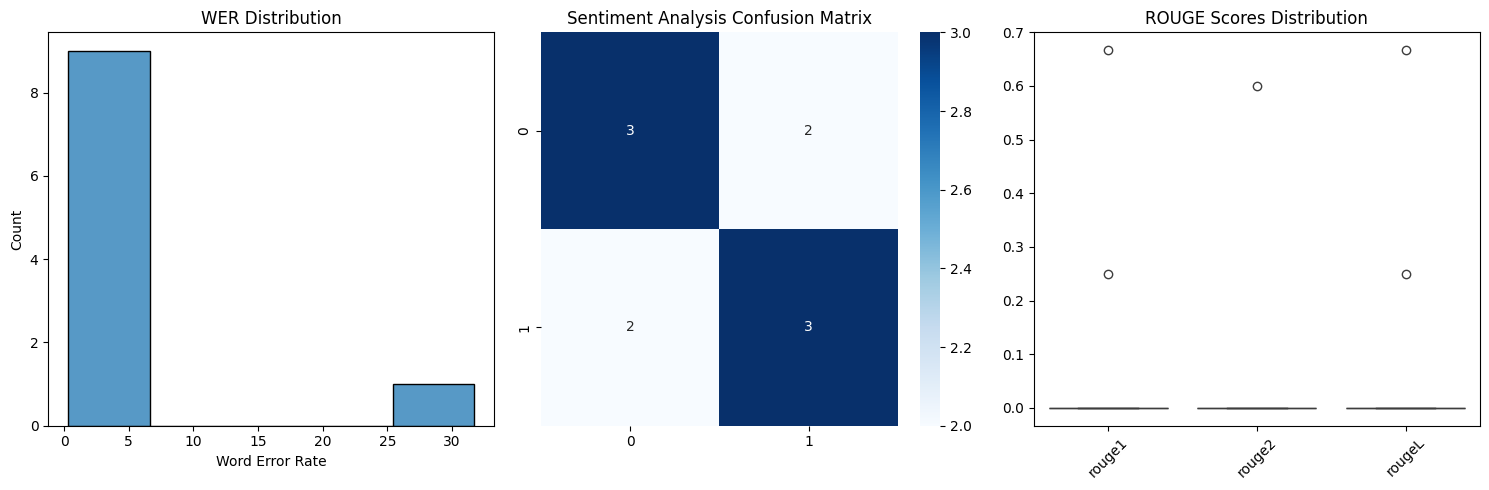

In [25]:
# Visualize evaluation results
plt.figure(figsize=(15, 5))

# Plot WER distribution
plt.subplot(131)
sns.histplot(evaluation_results['wer_scores'])
plt.title('WER Distribution')
plt.xlabel('Word Error Rate')

# Plot confusion matrix
plt.subplot(132)
sns.heatmap(
    sentiment_metrics['confusion_matrix'],
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title('Sentiment Analysis Confusion Matrix')

# Plot ROUGE scores
plt.subplot(133)
rouge_data = pd.DataFrame(evaluation_results['rouge_scores'])
sns.boxplot(data=rouge_data)
plt.title('ROUGE Scores Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<a id='7'></a>
## 7. Deployment

Let's create a Streamlit web interface for real-time audio processing. This interface will allow users to:
1. Upload audio files
2. Record audio directly
3. View processing results in real-time
4. Provide feedback for model improvement

In [34]:
%%writefile app.py
import streamlit as st
import numpy as np
import torch
import librosa
import tempfile
from datetime import datetime
import json
import plotly.express as px
from concurrent.futures import ThreadPoolExecutor

# Import our processing classes
from audio_processor import AudioProcessor, AudioPreprocessor

# Initialize processor with GPU if available
processor = AudioProcessor()
preprocessor = AudioPreprocessor()

def save_feedback(feedback_data):
    """Save user feedback to a JSON file."""
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"feedback_{timestamp}.json"
    with open(filename, 'w') as f:
        json.dump(feedback_data, f)
    return filename

def process_audio_parallel(audio_file, chunk_size=30000):
    """Process audio in parallel chunks."""
    # Load audio
    audio, sr = librosa.load(audio_file, sr=16000)

    # Split into chunks
    chunks = [audio[i:i + chunk_size] for i in range(0, len(audio), chunk_size)]

    # Process chunks in parallel
    with ThreadPoolExecutor(max_workers=4) as executor:
        results = list(executor.map(processor.process_audio_file, chunks))

    return results

def main():
    st.title("Swahili Speech Analysis Dashboard")

    # Sidebar for uploading audio
    st.sidebar.header("Upload Audio")
    audio_file = st.sidebar.file_uploader("Choose an audio file", type=['wav', 'mp3'])

    # Audio recording option
    st.sidebar.header("Or Record Audio")
    if st.sidebar.button("Record"):
        audio_bytes = st.audio_recorder()
        if audio_bytes:
            # Save recorded audio to temporary file
            with tempfile.NamedTemporaryFile(delete=False, suffix='.wav') as f:
                f.write(audio_bytes)
                audio_file = f.name

    if audio_file:
        st.header("Processing Audio...")

        # Process audio with progress bar
        with st.spinner("Processing..."):
            results = processor.process_audio_file(audio_file)

        # Display results
        st.subheader("Speech-to-Text Results")
        st.write(results['transcription'])

        st.subheader("Sentiment Analysis")
        sentiment_fig = px.pie(
            values=[results['sentiment']['score'], 1-results['sentiment']['score']],
            names=['Positive', 'Negative'],
            title='Sentiment Distribution'
        )
        st.plotly_chart(sentiment_fig)

        st.subheader("Text Summary")
        st.write(results['summary'])

        # Feedback section
        st.header("Provide Feedback")
        transcription_accuracy = st.slider(
            "Transcription Accuracy",
            0.0, 5.0, 3.0
        )
        sentiment_accuracy = st.slider(
            "Sentiment Analysis Accuracy",
            0.0, 5.0, 3.0
        )
        summary_quality = st.slider(
            "Summary Quality",
            0.0, 5.0, 3.0
        )

        if st.button("Submit Feedback"):
            feedback = {
                'timestamp': datetime.now().isoformat(),
                'transcription_accuracy': transcription_accuracy,
                'sentiment_accuracy': sentiment_accuracy,
                'summary_quality': summary_quality,
                'results': results
            }
            feedback_file = save_feedback(feedback)
            st.success(f"Feedback saved to {feedback_file}")

if __name__ == "__main__":
    main()

Overwriting app.py


In [27]:
!pip install colab-xterm
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 2.4 MB/s eta 0:00:00


In [37]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

To run the Streamlit app, save this notebook and execute the following command in the terminal:
```bash
streamlit run app.py
```

<a id='8'></a>
## 8. Feedback Loop and Model Refinement

The feedback loop is crucial for continuously improving our models. Here's how we implement it:

In [30]:
class ModelRefiner:
    def __init__(self, feedback_dir="feedback"):
        self.feedback_dir = feedback_dir
        os.makedirs(feedback_dir, exist_ok=True)

    def collect_feedback(self):
        """Collect and analyze user feedback."""
        feedback_files = glob.glob(os.path.join(self.feedback_dir, "feedback_*.json"))
        all_feedback = []

        for file in feedback_files:
            with open(file, 'r') as f:
                feedback = json.load(f)
                all_feedback.append(feedback)

        return pd.DataFrame(all_feedback)

    def analyze_feedback(self, feedback_df):
        """Analyze feedback to identify areas for improvement."""
        metrics = {
            'avg_transcription_accuracy': feedback_df['transcription_accuracy'].mean(),
            'avg_sentiment_accuracy': feedback_df['sentiment_accuracy'].mean(),
            'avg_summary_quality': feedback_df['summary_quality'].mean()
        }

        # Identify problem areas
        problem_areas = []
        for metric, value in metrics.items():
            if value < 3.5:
                problem_areas.append(metric)

        return metrics, problem_areas

    def generate_improvement_plan(self, metrics, problem_areas):
        """Generate a plan for model improvement based on feedback."""
        improvement_plan = {
            'transcription': [],
            'sentiment': [],
            'summary': []
        }

        if 'avg_transcription_accuracy' in problem_areas:
            improvement_plan['transcription'] = [
                "Collect more Swahili speech data",
                "Fine-tune Whisper model on specific accents",
                "Implement custom post-processing for Swahili"
            ]

        if 'avg_sentiment_accuracy' in problem_areas:
            improvement_plan['sentiment'] = [
                "Create Swahili sentiment dataset",
                "Fine-tune DistilBERT on Swahili text",
                "Implement language-specific preprocessing"
            ]

        if 'avg_summary_quality' in problem_areas:
            improvement_plan['summary'] = [
                "Collect Swahili summary pairs",
                "Fine-tune T5 on Swahili content",
                "Optimize summary length parameters"
            ]

        return improvement_plan

# Initialize refiner
refiner = ModelRefiner()

# Collect and analyze feedback
feedback_df = refiner.collect_feedback()
metrics, problem_areas = refiner.analyze_feedback(feedback_df)

# Generate improvement plan
improvement_plan = refiner.generate_improvement_plan(metrics, problem_areas)

# Display results
print("=== Current Model Performance ===")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}/5.0")

print("\n=== Identified Problem Areas ===")
for area in problem_areas:
    print(f"- {area}")

print("\n=== Improvement Plan ===")
for component, steps in improvement_plan.items():
    if steps:
        print(f"\n{component.title()} Improvements:")
        for step in steps:
            print(f"- {step}")

NameError: name 'glob' is not defined